In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
from itertools import product
%matplotlib inline 

## TASK - 1

### Generating Random Numbers

On a deterministic machine we cannot actually generate completely random numbers In order to generate actually random numbers we need external random inputs like weather, temperature, wind speed. But we can generate Pseudo random numbers and most of the time it serves the purpose. There are many methods to generate Pseudo random numbers.
Some of them are
- Middle Square method
- Linear Congruential generator(LCG)
- XOR shift algorithm
- Mersene Twister (The most effective PRNG)

What I am going to use is Linear Congruential generator (LCG)

### The Linear Congruential Generator (LCG) algorithm
Now this is a very basic algorithm but when used with right set of parameters it can generate random numbers with very high period. It takes a initial seed value, and 3 parameters
- a = is the multiplier
- c = is the incrementer
- m = is the modulo

And It uses this particular equation Xn+1 = (a*Xn + c) mod m, where Xn is any intermediate state(previous random number generated) and Xn+1 is the next state (curent random number generated) So we take initial value of X0 = seed.

Now we can see the algorithm is highly dependent on the parameters. So I am going to use the parameters available on wikipedia [https://en.wikipedia.org/wiki/Linear_congruential_generator]

When we run with the following parameters we can see that for 1st Million numbers there is no repeatation. Which means that the period of this PRNG is > 1000000 which is good enough for this task.

In [36]:
#Task - 1

a = 1664525
m = 2**32
c = 1013904223
seed = 1

def rand_generator():
    global seed
    seed = (seed*a + c)%m
    return seed

#Uncomment this section to see that there is no repeatation in first 1 million number generated
#rand_generated = [seed]

#for i in range(1000000):
#    r = rand_generator()
#    if r in rand_generated:
#        break
#    rand_generated.append(r)
#print(i+1)

#Uncomment this line to see the random values generated
#print(rand_generated)

In the above function we return the random number generated which is the state but usually for computation this is not a good idea becuse it takes a lot of memmory and exposes the state of the PRNG which makes it a bad algorithm for using any cryptographic purpose.

Since we are interested in also plotting the random numbers we will perform some logical operations to return random numbers because outputing the just the state value doesn't generates very distributes the random value properly And returning a 8bit value so that it will also be easier for us to prove the randomness. This idea is taken from this paper [https://www.pcg-random.org/pdf/hmc-cs-2014-0905.pdf].

## TASK - 2

In [29]:
a = 1664525
m = 2**16
c = 1013904223
seed = 1

def rand_generator_without_shift():
    global seed
    seed = (seed*a + c)%m
    return seed%(2**8)

##### Plotting the random numbers generated

To plot the randomness we will generate 2^16 random co-ordinates pairs using the rand_generator() function and then we will count the occurence of each pairs and then we plot them using 2D image plot where each pixel in 256x256 color gradient in white to black where black represents (more number of occuernce in random pair) and white (represents no occurence in random co-ordinates pairs).

Text(0, 0.5, 'y')

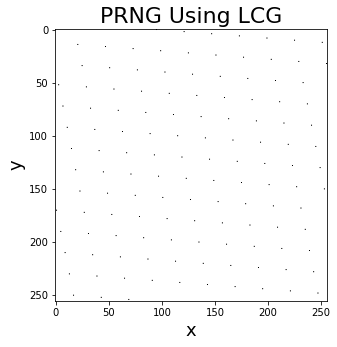

In [31]:
#Generate all pairs of random co-ordinates for 8-bit 
coord = [(rand_generator_without_shift(), rand_generator_without_shift()) for _ in range(2**16)]
#Count occurence of each pair of random co-ordinate
output = [np.zeros(2**8) for _ in range(2**8)]

#Count
for x in coord:
    output[x[0]][x[1]] += 1

# apply weighting to counts to determine pixel being white/black
for i, row in enumerate(output):
    for j, col in enumerate(row):
        output[i][j] = 2**(8 - output[i][j])

# plot our output using a 2D image of 256x256
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(output, cmap='gray', vmin=0, vmax=255)
ax.set_title('PRNG Using LCG', fontsize=22)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)

###### Now take a step back and we can clearly see there is a pattern and the co-ordinates generated using the rand_generator_without_shift() doesn't generates completely random values.

###### Now lets generate same plot using shift operation to the state values

In [32]:
a = 1664525
m = 2**16
c = 1013904223
seed = 1

def rand_generator_with_shift():
    global seed
    seed = (seed*a + c)%m
    return (seed >> (8 - 2 - (seed >> (16 - 2)))) & (2**8 - 1)

Text(0, 0.5, 'y')

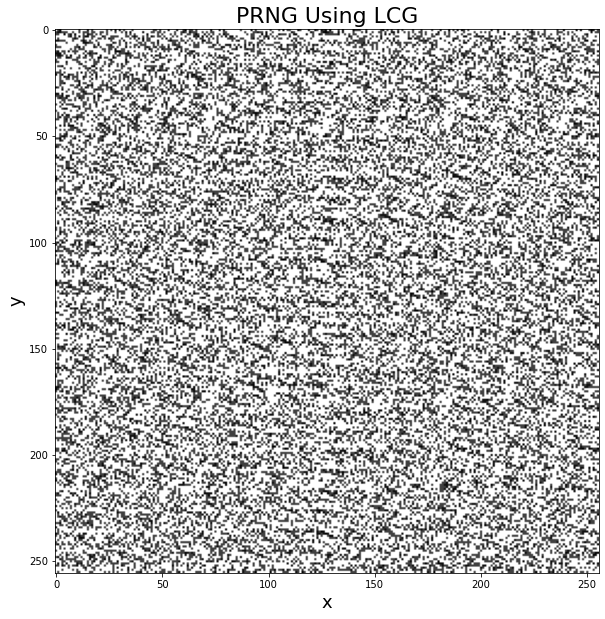

In [33]:
#Generate all pairs of random co-ordinates for 8-bit 
coord = [(rand_generator_with_shift(), rand_generator_with_shift()) for _ in range(2**16)]
#Count occurence of each pair of random co-ordinate
output = [np.zeros(2**8) for _ in range(2**8)]

#Count
for x in coord:
    output[x[0]][x[1]] += 1

# apply weighting to counts to determine pixel being white/black
for i, row in enumerate(output):
    for j, col in enumerate(row):
        output[i][j] = 2**(8 - output[i][j])

# plot our output using a 2D image of 256x256
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(output, cmap='gray', vmin=0, vmax=255)
ax.set_title('PRNG Using LCG', fontsize=22)
ax.set_xlabel('x', fontsize=18)
ax.set_ylabel('y', fontsize=18)

###### But when we generate same plot using shift operation to the state values we can clearly see there is no pattern and the co-ordinates generated using LCG with shift operation are very much random.

## TASK - 3

### Predict the value of pi(3.14 ) (upto two decimal places) with the help of the function created in 1st Task

To perdict value of $\pi\$ Using random values we need to generate bunch of random values in range [0, 1) because I we will be taking square of 1x1. And then we plot those values in a square of side lenght 1 then we count the number of points that fall under the quadrant of radius 1 and center at one of the vertex of square.

Then Using this concept we can find the value of $\pi\$

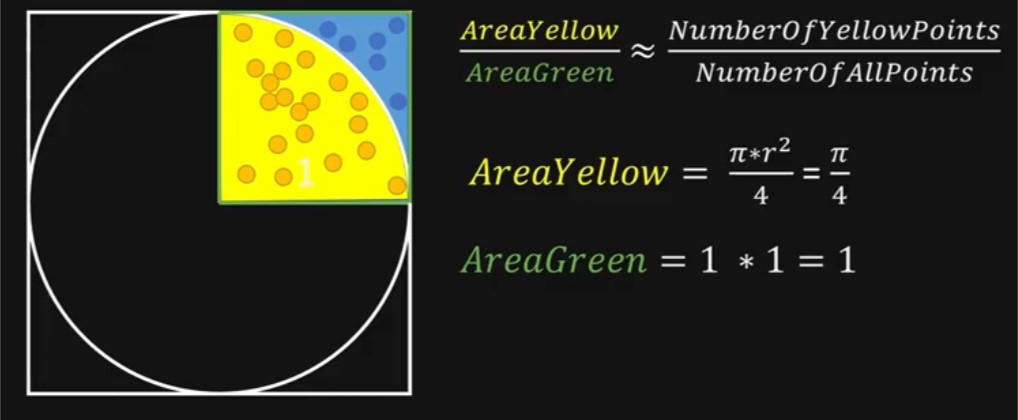

So $\pi\$ = 4 * (Number of points inside circle) / Total number of points

To find the ponts inside circle we will take center of circle as origin and if length of (x, y) <= 1 then it lies inside or on the circle or else outside the circle.

In [52]:
#utility function to find distance from center of circle which is assumed to be origin
def dist_from_origin(x, y):
    return np.sqrt(x**2 + y**2)

#lets take 1000 random co-ordinates in a range (0, 1)

total_points = 1000
#we need to divide by (2**32) to make the co-ordinates value < 1
coord_pairs = [(rand_generator()/(2**32), rand_generator()/(2**32)) for _ in range(total_points)]


no_of_points_inside_circle = 0
for co_pair in coord_pairs:
    if dist_from_origin(co_pair[0], co_pair[1]) <= 1:
        no_of_points_inside_circle += 1

pi = 4 * no_of_points_inside_circle / total_points
print(f'Value of Pi = {pi}')

Value of Pi = 3.14
